In [39]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
from torch.utils.data import TensorDataset, DataLoader

In [40]:
faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
X_train = TensorDataset(torch.unsqueeze(torch.Tensor(faces['images']),1))

In [41]:
X_train[0][0].shape

torch.Size([1, 64, 64])

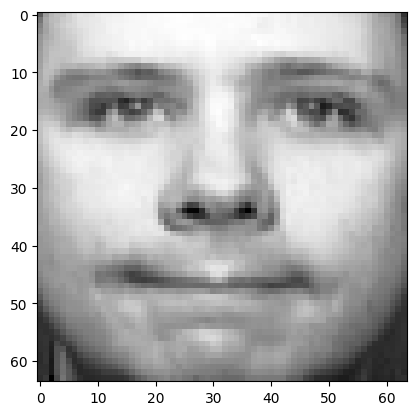

In [42]:
plt.imshow(X_train[0][0][0],cmap='gray')

In [43]:
from convautoencoder import ConvAutoEncoder

In [44]:
model = ConvAutoEncoder()

In [45]:
MULTIPROCESSING_CONTEXT = "fork"

In [46]:
train_loader = DataLoader(X_train, 
                          batch_size=32, 
                          shuffle=True,
                        #   num_workers=1,  
                        #   multiprocessing_context=MULTIPROCESSING_CONTEXT
                          )


In [47]:
trainer = pl.Trainer(max_epochs=20)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [48]:
trainer.fit(model=model,train_dataloaders=train_loader)


  | Name     | Type       | Params
----------------------------------------
0 | _encoder | Sequential | 92.9 K
1 | _decoder | Sequential | 92.8 K
----------------------------------------
185 K     Trainable params
0         Non-trainable params
185 K     Total params
0.743     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s, loss=0.000577, v_num=5]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s, loss=0.000577, v_num=5]


In [49]:
SIZE=5
indices = torch.randint(0,400,(SIZE,))

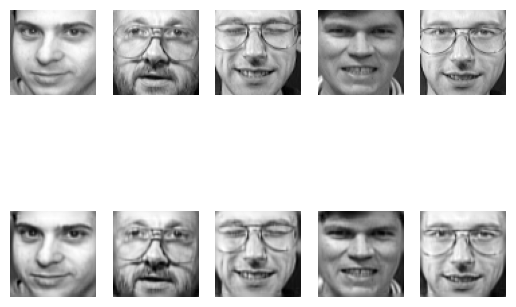

In [50]:
fig, ax = plt.subplots(2,SIZE)
for i in range(SIZE):
    original = X_train[indices[i]][0][0,:,:]
    with torch.no_grad():
        model_img = model(X_train[indices[i]][0])[0,:,:]
    ax[0,i].imshow(original, cmap='gray')
    ax[1,i].imshow(model_img, cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].axis('off')